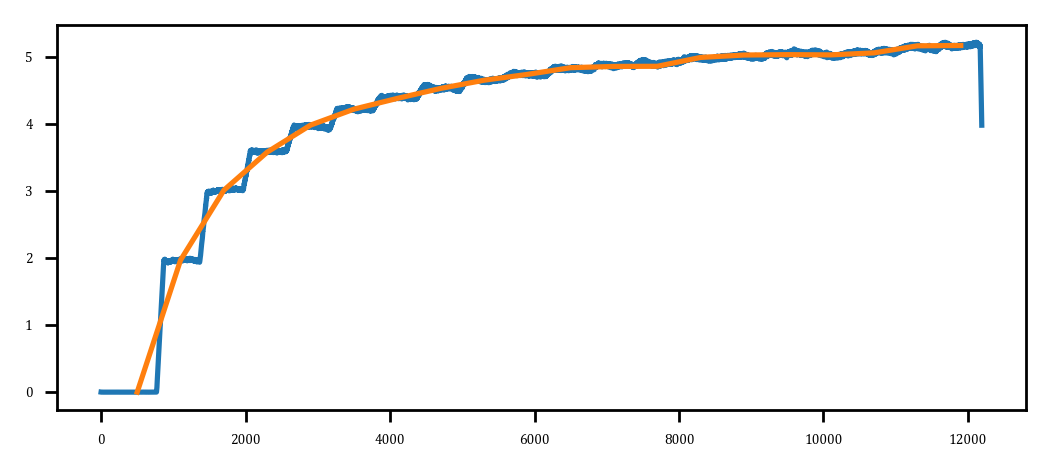

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 2]                       # Make plots as wide as my screen
plt.rcParams['figure.dpi'] = 250                               # Higher resolution plots
plt.rcParams['font.size'] = 4                                  # Font size for plots
plt.rcParams['font.family'] = 'Cambria'                                  # Font size for plots

id = 1
history = np.load("Data/Save_" + str(id) + ".npy")
theta = history[:,0]
theta_dot = history[:,1]
time = history[:,2]/1e9

dtheta = theta[1:]-theta[:-1]
dtheta = np.where(dtheta < -0.1, dtheta + 2*np.pi, dtheta)
dt = (time[1:]-time[:-1])

window = 100
filter = np.ones(window)/window # Moving average
window = np.shape(filter)[0]
dtheta_filtered = np.convolve(dtheta,filter,mode='same')[window:-window]
dt_filtered = np.convolve(dt,filter,mode='same')[window:-window]

omega = dtheta_filtered / dt_filtered

bucket_size = 400
increment = 600
start_index = 500
num = 20

centers = np.arange(start_index,start_index+num*increment,increment)
points = omega[centers]

fig,ax = plt.subplots()
ax.plot(omega)
ax.plot(centers,points)
# ax[1].plot(omega[500:5000])

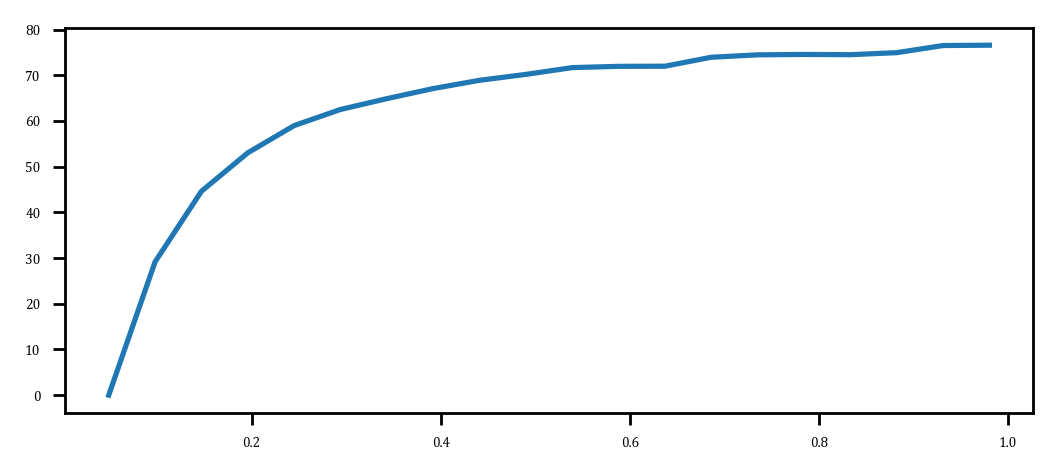

In [2]:
wheel_spacing = 29.6
linear_velocities = points * wheel_spacing/2
voltages = np.linspace(0.049,0.049*num,num)
fig,ax = plt.subplots()
# ax.plot(linear_velocities,voltages)
ax.plot(voltages,linear_velocities)

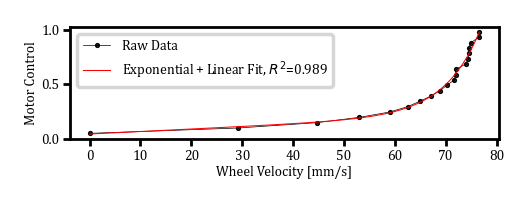

In [8]:
def fun(a,b,c,d,x):
    return a*np.exp(b*x) + c*x + d

def eval(coefs, data):
    x,y = data
    a,b,c,d = coefs
    y_fit = fun(a,b,c,d,x)
    return y_fit-y

def rsquared(y,y_fit):
    y_bar = np.sum(y)/len(y)
    ssreg = np.sum((y_fit-y_bar)**2)
    sstot = np.sum((y-y_bar)**2)
    r2 = ssreg / sstot
    return r2

coefs_init = (0.007,0.09,0.1,0.001)

result = sp.optimize.least_squares(eval,coefs_init,args=((linear_velocities,voltages),))
a,b,c,d = result.x

vel_plot = np.linspace(0,linear_velocities[-1],100)
vol_plot = fun(a,b,c,d,vel_plot)
voltages_fit = fun(a,b,c,d,linear_velocities)

r2 = rsquared(voltages,voltages_fit)

fig,ax = plt.subplots(layout='constrained')
ax.plot(linear_velocities,voltages,marker='.',markersize=1.0,lw=0.2,c='black',label="Raw Data")
ax.plot(vel_plot,vol_plot,lw=0.3,c='red',label="Exponential + Linear Fit, $R^2$={:.3f}".format(r2))
ax.set_xlabel("Wheel Velocity [mm/s]",labelpad=1)
ax.set_ylabel("Motor Control",labelpad=1)
ax.tick_params(length=2,pad=1)
ax.legend()
fig.set_size_inches(2,0.7)

In [4]:
result.x

array([1.23746508e-05, 1.43929265e-01, 2.29050611e-03, 4.28996437e-02])

In [5]:
np.e

2.718281828459045